In [42]:
from pandas_datareader import data as pdr
import pandas_datareader.data as web
import datetime
import time
import numpy as np
import pandas as pd
#import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [12]:
%pylab
%matplotlib inline

%config InlineBackend.figure_format = 'retina'

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


To calculate the Beta in a certain period, we have to have the stock price data during that period with the pandas_datareader library.


In [ ]:
#Defining the meaning of the Beta.
#References:
#https://www.eleconomista.es/diccionario-de-economia/beta
#https://www.invertirenbolsa.info/articulo_beta_definicion_utilidad.htm
#http://www.investopedia.com/ask/answers/070615/what-formula-calculating-beta.asp

In [3]:
#We determine the time window for beta calculation. In this case 5 years from the current date
edate =   datetime.datetime(2020,6, 29, 0, 0, 0, 0)
sdate = edate - datetime.timedelta(days=5*365)

ticker_symbol = 'ELE.MC' #ENDESA S.A Company
ref_index = '^IBEX' #Reference index

df_stock = pdr.get_data_yahoo(ticker_symbol, start=sdate, end=edate)
df_index = pdr.get_data_yahoo(ref_index, start=sdate, end=edate)

In [4]:
df_stock

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-07-01,17.010000,16.674999,16.885000,16.860001,12479943.0,12.180390
2015-07-02,17.230000,16.855000,16.889999,17.065001,3221242.0,12.328492
2015-07-03,17.254999,16.905001,17.120001,17.014999,7702140.0,12.292369
2015-07-06,16.965000,16.635000,16.750000,16.715000,4972503.0,12.075637
2015-07-07,16.855000,16.549999,16.725000,16.575001,2028411.0,11.974494
...,...,...,...,...,...,...
2020-06-23,23.020000,22.570000,22.650000,22.900000,9508260.0,22.117138
2020-06-24,22.879999,22.379999,22.799999,22.500000,8909977.0,21.730812
2020-06-25,22.740000,22.209999,22.510000,22.440001,1162106.0,21.672863


In [5]:
df_index

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-07-01,11036.900391,10784.299805,10857.700195,10911.500000,310649600.0,10911.489258
2015-07-02,10960.700195,10835.500000,10932.000000,10846.400391,209127500.0,10846.389648
2015-07-03,10860.700195,10730.000000,10835.700195,10779.799805,197292400.0,10779.789062
2015-07-06,10653.700195,10496.000000,10571.799805,10540.099609,353557100.0,10540.088867
2015-07-07,10588.500000,10332.099609,10554.900391,10346.000000,325139700.0,10345.989258
...,...,...,...,...,...,...
2020-06-23,7495.100098,7366.600098,7408.799805,7438.399902,260896400.0,7438.399902
2020-06-24,7440.899902,7195.500000,7403.899902,7195.500000,248464400.0,7195.500000
2020-06-25,7295.799805,7077.799805,7176.399902,7270.299805,267871700.0,7270.299805


In [6]:
# create a time-series of monthly data points
df_stock = df_stock.resample('M').last()
df_index = df_index.resample('M').last()

In [7]:
df_stock.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-07-31,19.160000,18.809999,19.045,19.139999,2186004.0,13.827559
2015-08-31,18.570000,18.309999,18.330,18.500000,1936263.0,13.365198
2015-09-30,18.969999,18.650000,18.875,18.840000,2463340.0,13.610825
2015-10-31,20.260000,20.014999,20.215,20.250000,2273282.0,14.629473
2015-11-30,19.625000,19.340000,19.445,19.580000,3403471.0,14.145438


In [8]:
df_stock.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-02-29,23.700001,22.879999,23.690001,23.230000,3655916.0,22.435856
2020-03-31,19.860001,19.070000,19.565001,19.469999,1356168.0,18.804396
2020-04-30,20.770000,20.250000,20.740000,20.250000,1552054.0,19.557732
2020-05-31,21.719999,21.120001,21.580000,21.350000,3098386.0,20.620127
2020-06-30,22.080000,21.580000,22.000000,21.590000,263963.0,21.590000


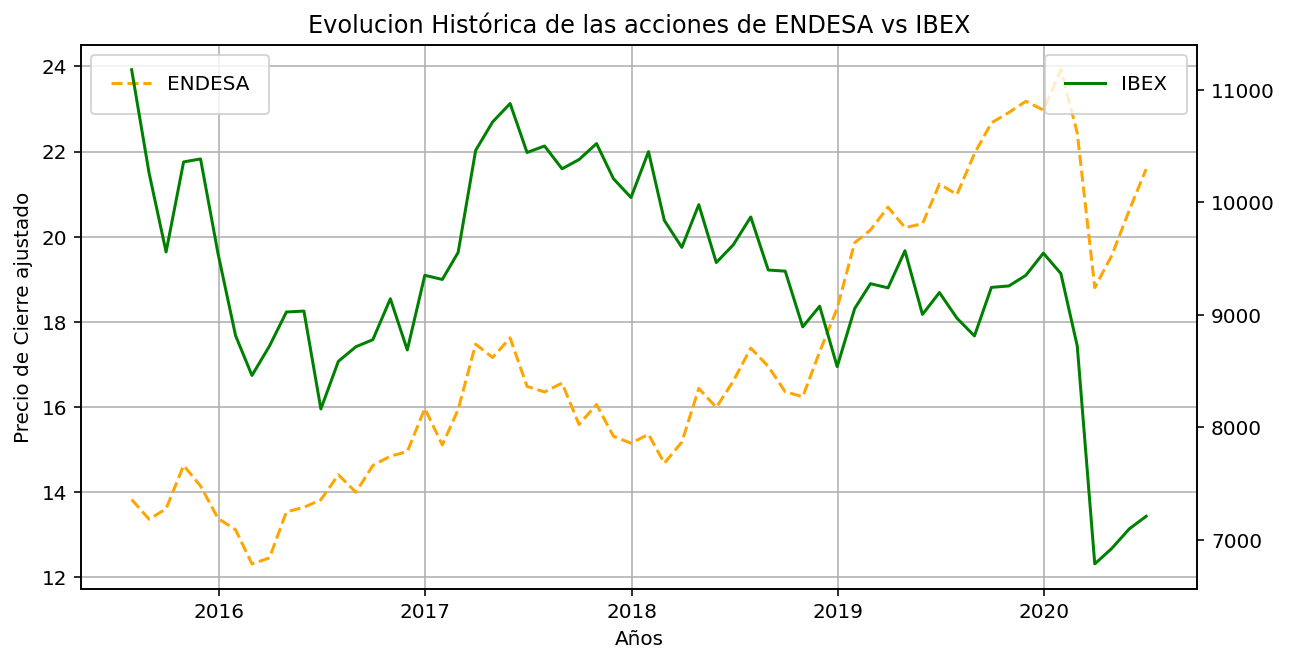

In [33]:
fig, ax1 = plt.subplots(figsize=(10, 5))
ax1.plot(df_stock['Adj Close'], 'orange', linestyle='--', label='ENDESA')
ax2 = ax1.twinx()
ax2.plot(df_index['Adj Close'], 'Green', linestyle='-', label='IBEX')
#We peeking a name for the y chart for the x and y axes
plt.title('Evolucion Histórica de las acciones de ENDESA vs IBEX',fontsize = 12)
ax1.set_xlabel('Años')
ax1.set_ylabel('Precio de Cierre ajustado', color='black')
#We set the legend, the grid lines and show the chart 
ax1.legend(loc='upper left', frameon=True, borderpad=1)
ax2.legend(loc='upper right', frameon=True, borderpad=1)
ax1.grid(True)
ax2.grid(False)
plt.show()

In [ ]:
#References:
#https://relopezbriega.github.io/blog/2016/09/26/series-de-tiempo-con-python/
#https://quantspace.es/2019/11/22/analizando-series-temporales-con-python/

A common operation in the time series data is to calculate the returns by moving the values back and forth in time, in Pandas we can use the shift() method, then calculate the percentage change of variation of each month in the time series and generate the new variables as returns. Finally we add those two variables to a new dataset.

In [34]:
#Calculating returns
# -*- coding: utf-8 -*-
"""
reference: http://gouthamanbalaraman.com/blog/calculating-stock-beta.html
"""
df_stock['returns'] = df_stock['Adj Close']/ df_stock['Adj Close'].shift(1) -1
df_stock = df_stock.dropna()
df_index['returns'] = df_index['Adj Close']/ df_index['Adj Close'].shift(1) -1
df_index = df_index.dropna()

df = pd.DataFrame({'stock_returns' : df_stock['returns'],
                        'index_returns' : df_index['returns']},
                        index=df_stock.index)
df = df.dropna()

In [38]:
df.head()

,stock_returns,index_returns
Date,,
2015-08-31,-0.033438,-0.082437
2015-09-30,0.018378,-0.068145
2015-10-31,0.074841,0.083767
2015-11-30,-0.033086,0.002529
2015-12-31,-0.053882,-0.081131


Beta's formula would be:
![Beta formula](images/Beta_formula.png)

In [35]:
#We define a function to calculate the covariance
def covariance(a, b):
    if len(a) != len(b):
        return
    a_mean = np.mean(a)
    b_mean = np.mean(b)
    sum = 0
    for i in range(0, len(a)):
        sum += ((a[i] - a_mean) * (b[i] - b_mean))
    return sum/(len(a)-1)

In [37]:
print(edate)
numerator = covariance(df['stock_returns'],df['index_returns'])
print("COVARIANCE(stock, benchmark) = COVARIANCE("+ticker_symbol+", "+ref_index +") = " +str(numerator))
denominator = covariance(df['index_returns'],df['index_returns'])
print("VARIANCE(benchmark) = COVARIANCE(benchmark, benchmark) = COVARIANCE("+ref_index+", "+ref_index +") = " +str(denominator))

# BETA = Covariance (stock,index) / Variance (Index) = Covariance (stock,index) / Covariance (stock,stock)
print("BETA = COVARIANCE(stock, benchmark) / VARIANCE(benchmark) = " + str(numerator) + " / " + str(
                            denominator) + " = " +str(covariance(df['stock_returns'],df['index_returns'])/covariance(
                            df['index_returns'],df['index_returns'])))

2020-06-29 00:00:00
COVARIANCE(stock, benchmark) = COVARIANCE(ELE.MC, ^IBEX) = 0.0017283730524372245
VARIANCE(benchmark) = COVARIANCE(benchmark, benchmark) = COVARIANCE(^IBEX, ^IBEX) = 0.0027191533612960913
BETA = COVARIANCE(stock, benchmark) / VARIANCE(benchmark) = 0.0017283730524372245 / 0.0027191533612960913 = 0.6356291178859405


Factorizamos este desarrollo para aplicarlo a un conjunto de empresas:

In [43]:
#We generate a function with the above tests to calculate the Beta of each record
def BetaCalculated(ticker_symbol, ref_index, source_web, sdate, edate):
    try:
        df_stock = web.DataReader(ticker_symbol,source_web,sdate,edate)
        df_index = web.DataReader(ref_index,source_web,sdate,edate)
        #df_stock = pdr.get_data_yahoo(ticker_symbol, start=sdate, end=edate)
        #df_index = pdr.get_data_yahoo(ref_index, start=sdate, end=edate)
        # create a time-series of monthly data points
        df_stock = df_stock.resample('M').last() #We group by Month, i.e. one record per month of each year
        df_index = df_index.resample('M').last() #We group by Month
        df_stock['returns'] = df_stock['Adj Close']/ df_stock['Adj Close'].shift(1) -1
        df_stock = df_stock.dropna()
        df_index['returns'] = df_index['Adj Close']/ df_index['Adj Close'].shift(1) -1
        df_index = df_index.dropna()

        df = pd.DataFrame({'stock_returns' : df_stock['returns'],
                                'index_returns' : df_index['returns']},
                                index=df_stock.index)
        df = df.dropna()
        numerator = covariance(df['stock_returns'],df['index_returns'])
        denominator = covariance(df['index_returns'],df['index_returns'])
        BetaCalculated = numerator/denominator
    except:
        BetaCalculated = np.nan
        time.sleep(5)
    return BetaCalculated

In [44]:
#We prove it works with the values tested above
edate =   datetime.datetime(2020,6, 29, 0, 0, 0, 0)
sdate = edate - datetime.timedelta(days=5*365)

ticker_symbol = 'ELE.MC' #ENDESA S.A Company
ref_index = '^IBEX' #Reference index
source_web = 'yahoo'#Resource where to extract data

BetaCalculated(ticker_symbol, ref_index, source_web, sdate, edate)

0.6388905126711596

In [49]:
df_ibex35 = pd.read_csv('data/df_madrid.csv', index_col=0)

In [51]:
df_ibex35.head()

,ScrapedName,ticker,Capitalización de mercado (intradía),Valor de empresa,P/E últimos 12 meses,Precio/beneficio anticipado,Ratio PEG (5 años previstos),Precio/ventas,Precio/valor,Valor/Ingresos de la empresa,...,Previsión de la rentabilidad anual por dividendo,Cambio de dividendo anual de los últimos 12 meses,Rentabilidad por dividendo de los últimos 12 meses,Rentabilidad por dividendo de los últimos 5 años,Ratio de distribución de dividendos,Fecha del dividendo,Fecha de exdividendo,Último factor del split,Última fecha del split,Sector
0,"ENDESA,S.A. (ELE.MC)",ELE.MC,2.558000e+10,3.134000e+10,149.14,17.38,6.91,1.32,3.33,1.62,...,0.0607,0.0,0.0616,0.0,8.9188,0,30 dic. 2019,0.0,0.0,Utilities
1,"EUSKALTEL, S.A. (EKT.MC)",EKT.MC,1.490000e+09,2.980000e+09,24.03,18.53,1.56,2.17,1.52,4.35,...,0.0386,0.0,0.0374,0.0,0.8857,0,03 feb. 2020,0.0,0.0,Communication Services
2,"APPLUS SERVICES, S.A. (APPS.MC)",APPS.MC,1.450000e+09,2.130000e+09,26.12,13.55,2.35,0.82,1.87,1.20,...,0.0146,0.0,0.0220,0.0,0.3846,0,02 jul. 2019,0.0,0.0,0
3,"CELLNEX TELECOM, S.A. (CLNX.MC)",CLNX.MC,1.830000e+10,2.246000e+10,0.00,0.00,0.00,18.30,4.40,22.46,...,0.0017,0.0,0.0020,0.0,0.0000,0,20 nov. 2019,0.0,0.0,Communication Services
4,"DURO FELGUERA, S.A. (MDF.MC)",MDF.MC,3.090000e+07,-6.467000e+07,0.00,0.00,0.00,0.07,5.05,-0.15,...,0.0000,0.0,0.0000,0.0,0.0000,0,17 sept. 2015,0.0,0.0,0


In [52]:
print(datetime.datetime.today())

2020-06-30 20:01:40.424074


In [53]:
#We apply the functions to the df records
#edate =   datetime.datetime(2015,12, 31, 0, 0, 0, 0)
edate =   datetime.datetime.today()
sdate = edate - datetime.timedelta(days=5*365)

ref_index = '^IBEX' #Reference index
source_web = 'yahoo'
df_ibex35['BetaCalculated'] = df_ibex35['ticker'].apply(lambda x: BetaCalculated(x, ref_index, source_web, sdate, edate))

In [58]:
df_ibex35[['ticker', 'BetaCalculated', 'Beta (5 años al mes)']].head()

,ticker,BetaCalculated,Beta (5 años al mes)
0,ELE.MC,0.638409,0.42
1,EKT.MC,0.767420,0.62
2,APPS.MC,0.951675,0.74
3,CLNX.MC,0.516367,0.48
4,MDF.MC,1.394329,1.52


In [59]:
#We look at which companies don't get data to calculate the Beta
nan_rows = df_ibex35[df_ibex35['BetaCalculated'].isnull()]
nan_rows[['ticker','BetaCalculated']]

,ticker,BetaCalculated
31,DGI.MC,NaN
32,TEC.MC,NaN
46,GAM.MC,NaN
49,NAT.MC,NaN
65,AXIA.MC,NaN
66,HIS.MC,NaN
70,PAC.MC,NaN
76,CPL.MC,NaN
78,FRS.MC,NaN
79,SAY.MC,NaN
